In [1]:
import sys
# sys.path.append('G:/My Drive/Research/adaptation_abm/code')
sys.path.append('/home/twilliams/adaptation_abm/code')
import model.model as mod_code
import plot.single_run as plt_single
import imp
import numpy as np
import pickle
imp.reload(mod_code)
import matplotlib.pyplot as plt

In [2]:
# f = '../../outputs/2019_10_15_4/POM/100000_10reps/input_params_0.pkl'
f = '../../outputs/es_r1_sims/POM/100000_10reps/input_params_0.pkl'
inputs = pickle.load(open(f, 'rb'))
inputs['adaptation']['burnin_period'] = 10

In [3]:
inputs['model']['seed'] = 0
inputs['model']['T'] = 100
# inputs['agents']['wealth_init_mean'] *=1
# inputs['land']['random_effect_sd'] = 0.5
inputs['model']['n_agents'] = 200
# inputs['agents']['land_area_multiplier'] = 1


# inputs['land']['wealth_N_conversion'] *= 0.9
# inputs['land']['organic_N_min_init'] = 6000
# inputs['land']['organic_N_max_init'] = 6000
inputs['agents']['wealth_constraint'] = False
# inputs['land']['random_effect_sd'] = 0.1

# inputs['model']['adaptation_option'] = 'cover_crop'
# inputs['agents']['adap_type'] = 'always'

In [4]:
m = mod_code.Model(inputs)
for t in range(m.T):
    m.step()

In [5]:
imp.reload(plt_single)
plt_single.main(m, save=False)

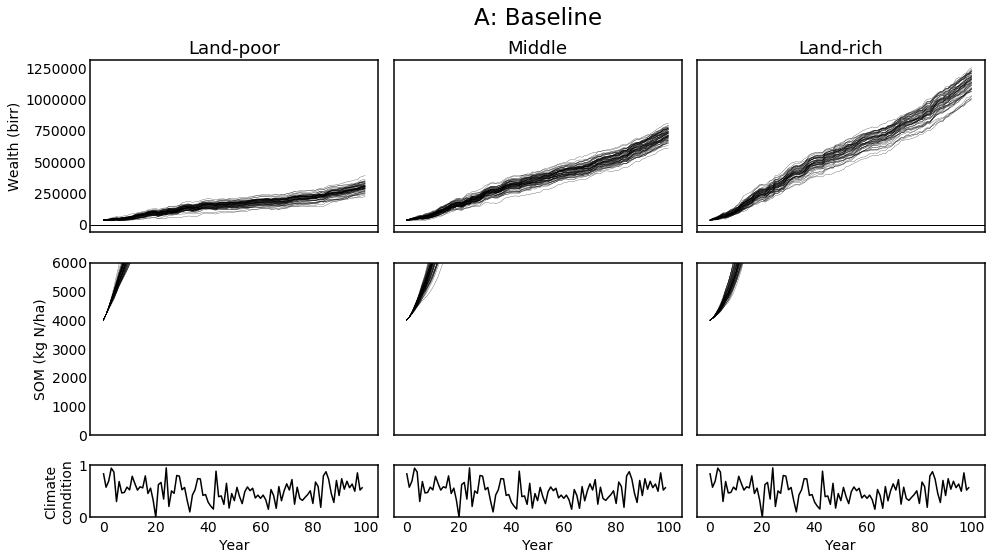

In [6]:
imp.reload(plt_single)
savedir = '../../outputs/es_r1_sims/'
pp = plt_single.separate(m, savedir)

In [ ]:
# assess variability in yields
print(m.land.yields.shape)
ags = m.agents.land_area == 1.5
o1 = np.mean(np.var(m.land.yields[:,ags], axis=0))
o2 = np.mean(np.var(m.land.yields[:,ags], axis=1))
print('agent variance is this fraction of annual variance')
print(o2/o1)